In [7]:
# Import required libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for easier inspection of dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)

# Relative path to the data folder
DATA = "data/"

# Load datasets
obesity = pd.read_csv(DATA + "obesity.csv")
healthexp = pd.read_csv(DATA + "healthexp.csv")
gdp = pd.read_csv(DATA + "gdp.csv")
urban = pd.read_csv(DATA + "urbanization.csv")
education = pd.read_csv(DATA + "education.csv")

# Preview the first rows of the obesity dataset to confirm correct loading
obesity.head()


,Entity,Code,Year,"Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+ years of age"
0,Afghanistan,AFG,1990,1.94951
1,Afghanistan,AFG,1991,2.10504
2,Afghanistan,AFG,1992,2.27339
3,Afghanistan,AFG,1993,2.45549
4,Afghanistan,AFG,1994,2.65288


In [8]:
# Inspect the structure of each dataset (column names, data types, and number of non-null values).
# This step helps verify that the files were loaded correctly and allows us to detect missing data patterns.
obesity.info()
healthexp.info()
gdp.info()
urban.info()
education.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 4 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                          --------------  -----  
 0   Entity                                                                                                                          6798 non-null   object 
 1   Code                                                                                                                            6600 non-null   object 
 2   Year                                                                                                                            6798 non-null   int64  
 3   Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: both sexes - Age gr

In [9]:
# Generate summary statistics for each dataset to understand the distribution of numerical variables.
# This helps identify typical values (mean/median), variability (std), and possible outliers.
obesity.describe()

,Year,"Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+ years of age"
count,6798.000000,6798.000000
mean,2006.000000,17.408626
std,9.522605,13.195865
min,1990.000000,0.207780
25%,1998.000000,7.733802
50%,2006.000000,15.376075
75%,2014.000000,22.918247
max,2022.000000,75.205330


In [10]:
healthexp.describe()
gdp.describe()
urban.describe()
education.describe()

,Year,Human Development Index
count,6683.000000,6604.000000
mean,2007.755798,0.682702
std,9.663149,0.163174
min,1990.000000,0.215000
25%,2000.000000,0.565000
50%,2008.000000,0.705000
75%,2016.000000,0.809000
max,2023.000000,0.972000


In [11]:
# Check for missing values in each dataset.
# This is essential for identifying incomplete observations and deciding how to handle them
print("Missing values in obesity:\n", obesity.isnull().sum(), "\n")
print("Missing values in health expenditure:\n", healthexp.isnull().sum(), "\n")
print("Missing values in GDP:\n", gdp.isnull().sum(), "\n")
print("Missing values in urbanization:\n", urban.isnull().sum(), "\n")
print("Missing values in education:\n", education.isnull().sum(), "\n")


Missing values in obesity:
 Entity                                                                                                                              0
Code                                                                                                                              198
Year                                                                                                                                0
Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: both sexes - Age group: 18+  years of age      0
dtype: int64 

Missing values in health expenditure:
 Entity                                                                    0
Code                                                                    276
Year                                                                      0
Current health expenditure per capita, PPP (current international $)      0
dtype: int64 

Missing values in GDP:
 Entity                                 

In [12]:
# Drop rows with missing values in key numerical columns.
# GDP and education datasets have missing values in their main indicators,
# so we remove rows where these target variables are NaN to ensure reliable analysis.
gdp = gdp.dropna(subset=[gdp.columns[3]])

In [13]:
education = education.dropna(subset=[education.columns[3]])

In [14]:
# Verify that missing values were successfully removed after cleaning.
gdp.isna().sum(), education.isna().sum()

(Entity                                                    0
 Code                                                    420
 Year                                                      0
 GDP per capita, PPP (constant 2021 international $)       0
 World regions according to OWID                        7039
 dtype: int64,
 Entity                                0
 Code                                630
 Year                                  0
 Human Development Index               0
 World regions according to OWID    6411
 dtype: int64)

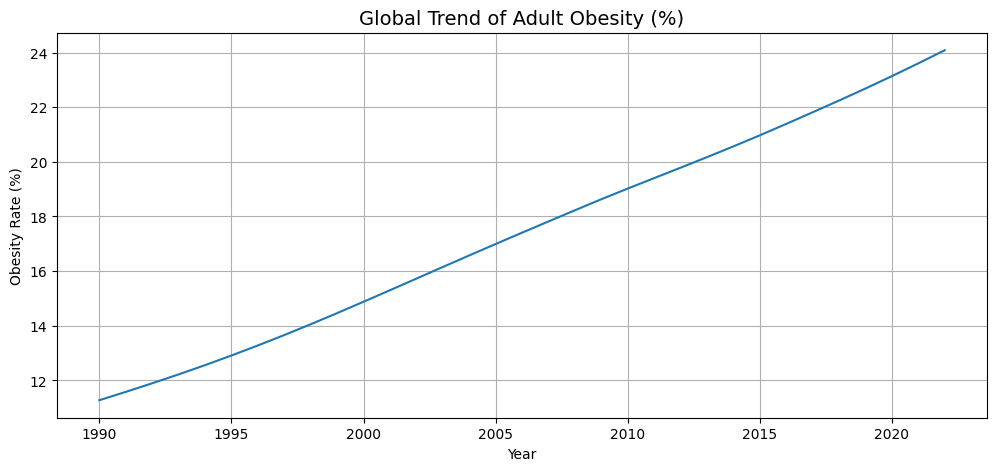

In [36]:
# Visualize the global trend of adult obesity over time.
# This line plot shows how obesity rates have evolved from 1990 to 2022,
# helping us observe whether obesity has been increasing, decreasing,
# or staying stable across years.
plt.figure(figsize=(12,5))
sns.lineplot(
    data=obesity,
    x="Year",
    y=obesity.columns[-1],
    errorbar=None  
)

plt.title("Global Trend of Adult Obesity (%)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.grid(True)
plt.show()

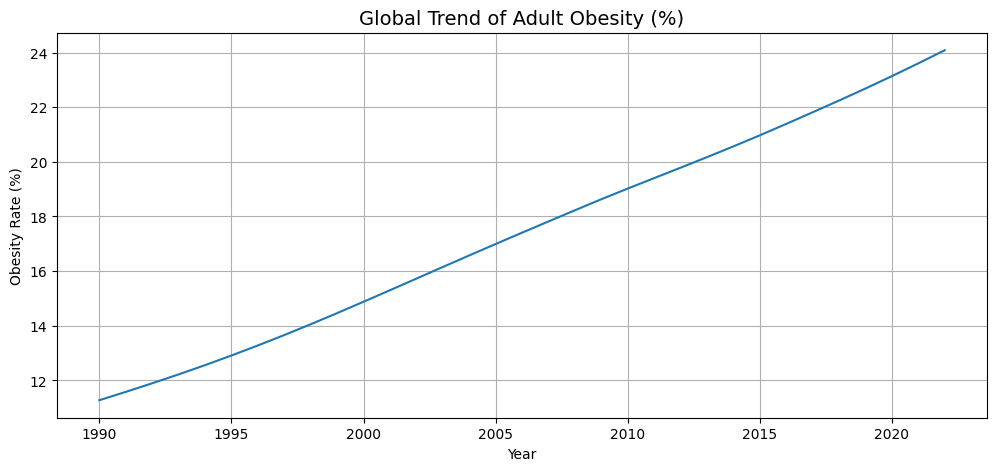

<Figure size 640x480 with 0 Axes>

In [16]:
# Visualize the global trend of adult obesity over time.
# This line plot shows how obesity rates have evolved from 1990 to 2022,
# helping us observe whether obesity has been increasing, decreasing,
# or staying stable across years.
plt.figure(figsize=(12,5))
sns.lineplot(
    data=obesity,
    x="Year",
    y=obesity.columns[-1],
    errorbar=None          # ci=None yerine artık bu
)
plt.title("Global Trend of Adult Obesity (%)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.grid(True)
plt.show()
plt.savefig("obesity_trend.png", dpi=300, bbox_inches='tight')
plt.show()

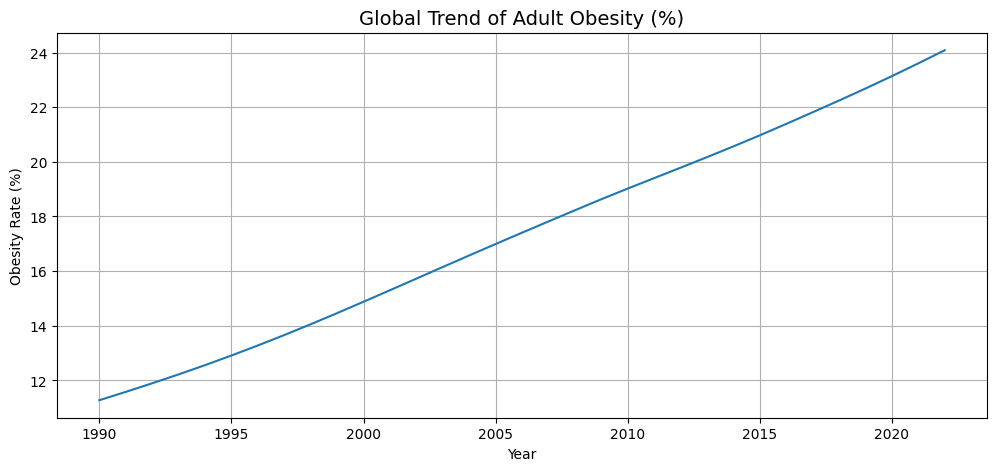

In [17]:
# Visualize the global trend of adult obesity over time.
# This line plot shows how obesity rates have evolved from 1990 to 2022,
# helping us observe whether obesity has been increasing, decreasing,
# or staying stable across years.
plt.figure(figsize=(12,5))
sns.lineplot(data=obesity, x="Year", y=obesity.columns[-1], errorbar=None)
plt.title("Global Trend of Adult Obesity (%)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.grid(True)

# Save BEFORE show
plt.savefig("obesity_trend.png", dpi=300, bbox_inches='tight')

plt.show()


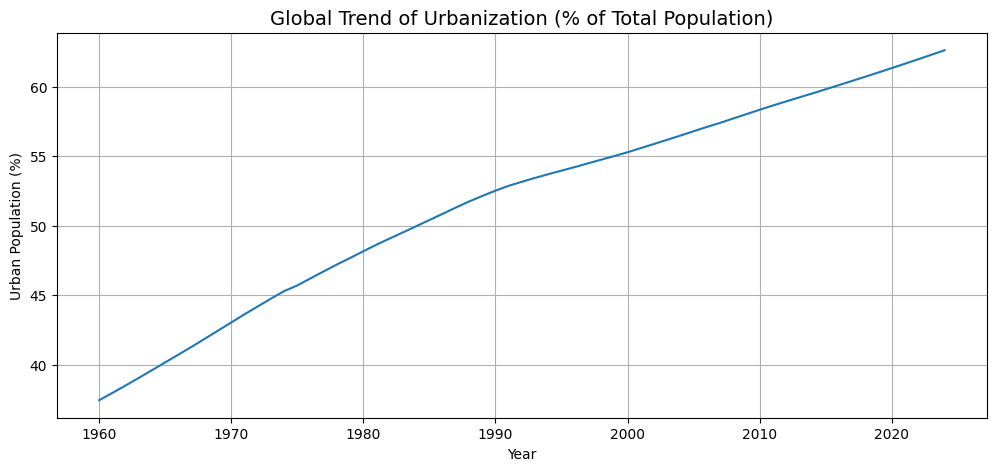

In [18]:
# Plot urbanization trend over time
plt.figure(figsize=(12,5))

# Line plot of global urban population percentage
sns.lineplot(
    data=urban,
    x="Year",
    y=urban.columns[3],   # Urban population (% of total population)
    errorbar=None        # cleaner look
)

# Title & labels
plt.title("Global Trend of Urbanization (% of Total Population)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Urban Population (%)")

# Show grid for readability
plt.grid(True)
plt.savefig("urbanization_trend.png", dpi=300, bbox_inches='tight')
plt.show()


In [20]:
# Merge obesity and healthexp on Entity + Year
merged = pd.merge(
    obesity,
    healthexp,
    on=["Entity", "Code", "Year"],
    how="inner"
)

In [21]:
# Rename columns for easier use
# The column names in the raw datasets are long; we replace them with simpler names.
merged = merged.rename(columns={
    merged.columns[3]: "ObesityRate",          # prevalence of obesity
    merged.columns[4]: "HealthExpenditure"     # health expenditure per capita
})

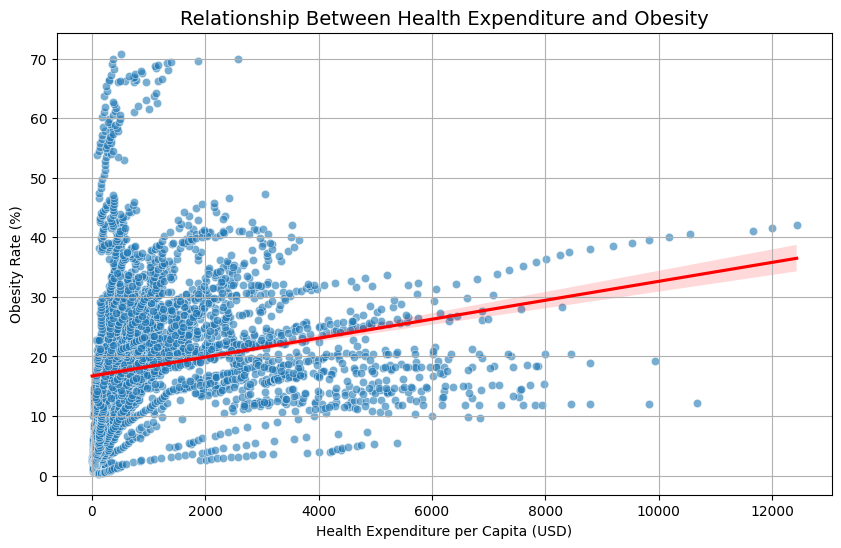

In [22]:
# Scatter plot: Health Expenditure vs Obesity
plt.figure(figsize=(10,6))

# Scatter points (each point is one country-year)
sns.scatterplot(
    data=merged,
    x="HealthExpenditure",
    y="ObesityRate",
    alpha=0.6        # makes points slightly transparent
)

# Regression line (trend line showing direction of the relationship)
sns.regplot(
    data=merged,
    x="HealthExpenditure",
    y="ObesityRate",
    scatter=False,   # don't re-plot points
    color="red"      # regression line color
)

# Title and labels
plt.title("Relationship Between Health Expenditure and Obesity", fontsize=14)
plt.xlabel("Health Expenditure per Capita (USD)")
plt.ylabel("Obesity Rate (%)")

# Grid for better readability
plt.grid(True)

# Save figure as PNG (high resolution)
plt.savefig("health_vs_obesity.png", dpi=300, bbox_inches="tight")

plt.show()

In [23]:
# --- Select & rename necessary columns for merging ---
obesity_clean = obesity[["Entity", "Year", obesity.columns[-1]]].rename(columns={
    obesity.columns[-1]: "ObesityRate"
})

healthexp_clean = healthexp[["Entity", "Year", healthexp.columns[-1]]].rename(columns={
    healthexp.columns[-1]: "HealthExpenditure"
})

gdp_clean = gdp[["Entity", "Year", gdp.columns[-1]]].rename(columns={
    gdp.columns[-1]: "GDPperCapita"
})

urban_clean = urban[["Entity", "Year", urban.columns[-1]]].rename(columns={
    urban.columns[-1]: "UrbanPopulation"
})

education_clean = education[["Entity", "Year", education.columns[-2]]].rename(columns={
    education.columns[-2]: "EducationIndex"
})

# --- Merge step-by-step on Entity and Year ---
df = obesity_clean.merge(healthexp_clean, on=["Entity", "Year"], how="inner")
df = df.merge(gdp_clean, on=["Entity", "Year"], how="inner")
df = df.merge(urban_clean, on=["Entity", "Year"], how="inner")
df = df.merge(education_clean, on=["Entity", "Year"], how="inner")

# Display
df.head()


,Entity,Year,ObesityRate,HealthExpenditure,GDPperCapita,UrbanPopulation,EducationIndex
0,Afghanistan,2002,4.97112,85.851810,NaN,22.261,0.383
1,Afghanistan,2003,5.36920,85.926730,NaN,22.353,0.392
2,Afghanistan,2004,5.79330,93.924644,NaN,22.500,0.408
3,Afghanistan,2005,6.24419,105.915500,NaN,22.703,0.417
4,Afghanistan,2006,6.72338,118.394180,NaN,22.907,0.426


In [24]:
# ---- Compute correlation matrix ----
corr = df[["ObesityRate", "HealthExpenditure", 
           "UrbanPopulation", "EducationIndex"]].corr()

corr


,ObesityRate,HealthExpenditure,UrbanPopulation,EducationIndex
ObesityRate,1.000000,0.203696,0.365940,0.438846
HealthExpenditure,0.203696,1.000000,0.582551,0.726928
UrbanPopulation,0.365940,0.582551,1.000000,0.716277
EducationIndex,0.438846,0.726928,0.716277,1.000000


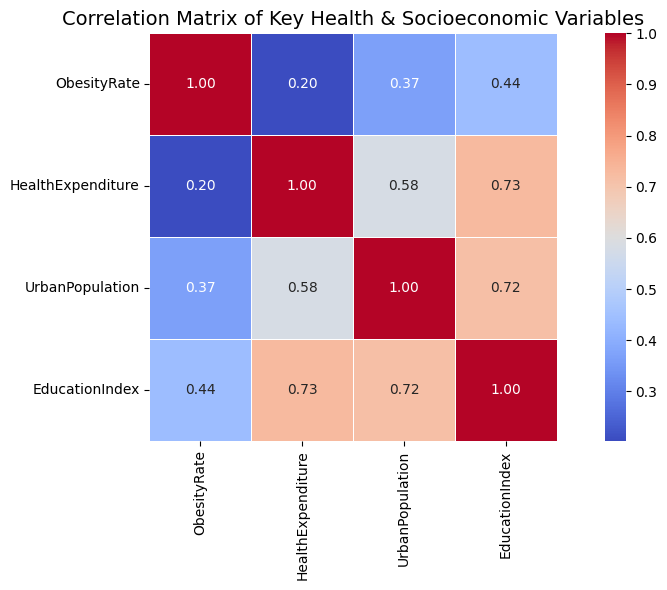

In [25]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(10,6))

# Draw heatmap with correlation values
sns.heatmap(
    corr, 
    annot=True,              # show correlation numbers
    cmap="coolwarm",         # color palette
    fmt=".2f",               # format numbers (2 decimal)
    linewidths=0.5,
    square=True
)

plt.title("Correlation Matrix of Key Health & Socioeconomic Variables", fontsize=14)
plt.tight_layout()

# Save figure for report (high quality)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
# MULTIPLE LINEAR REGRESSION: MODELING OBESITY RATE
import statsmodels.api as sm

# 1) Select variables for the model
model_df = df[["ObesityRate", "HealthExpenditure", "GDPperCapita", 
               "UrbanPopulation", "EducationIndex"]].dropna()

# 2) Define dependent variable (Y)
Y = model_df["ObesityRate"]

# 3) Define independent variables (X)
X = model_df[["HealthExpenditure", "GDPperCapita", "UrbanPopulation", "EducationIndex"]]

# 4) Add constant term (β0)
X = sm.add_constant(X)

# 5) Fit the regression model
model = sm.OLS(Y, X).fit()

# 6) Display full summary
model.summary()


In [27]:
df[["ObesityRate", "HealthExpenditure", "GDPperCapita", 
    "UrbanPopulation", "EducationIndex"]].isna().sum()

ObesityRate             0
HealthExpenditure       0
GDPperCapita         4104
UrbanPopulation         0
EducationIndex          0
dtype: int64

In [29]:
print(gdp.columns)

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2021 international $)',
       'World regions according to OWID'],
      dtype='object')


In [30]:
gdp = gdp.rename(columns={
    "GDP per capita, PPP (constant 2021 international $)": "GDPperCapita"
})

In [31]:
gdp_clean = gdp[["Entity", "Year", "GDPperCapita"]]

In [32]:
df = obesity_clean.merge(healthexp_clean, on=["Entity", "Year"], how="inner")
df = df.merge(gdp_clean, on=["Entity", "Year"], how="inner")
df = df.merge(urban_clean, on=["Entity", "Year"], how="inner")
df = df.merge(education_clean, on=["Entity", "Year"], how="inner")


In [33]:
df.head()

,Entity,Year,ObesityRate,HealthExpenditure,GDPperCapita,UrbanPopulation,EducationIndex
0,Afghanistan,2002,4.97112,85.851810,1774.3087,22.261,0.383
1,Afghanistan,2003,5.36920,85.926730,1815.9282,22.353,0.392
2,Afghanistan,2004,5.79330,93.924644,1776.9182,22.500,0.408
3,Afghanistan,2005,6.24419,105.915500,1908.1147,22.703,0.417
4,Afghanistan,2006,6.72338,118.394180,1929.7239,22.907,0.426


In [ ]:
df.isna().sum()

In [34]:
# MODEL A: Simple Linear Regression
# Purpose:
#   - Examine the direct relationship between Health Expenditure
#     and Obesity Rate without any control variables.
#   - This model answers: "Is higher health spending associated
#     with higher or lower obesity rates at a basic level?"

import statsmodels.api as sm

# Dependent variable (Y): Obesity Rate
Y = df["ObesityRate"]

# Independent variable (X): Health Expenditure per capita
X = df[["HealthExpenditure"]]

# Add constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model_A = sm.OLS(Y, X).fit()

# Display full model summary
model_A.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ObesityRate   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     177.6
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.09e-39
Time:                        02:02:36   Log-Likelihood:                -15852.
No. Observations:                4104   AIC:                         3.171e+04
Df Residuals:                    4102   BIC:                         3.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.8905      0.226     74.638      0.000      16.447      17.334
HealthExpenditure     0.0015      0.000     13.325      0.000       0.001       0.002
==============================================================================
Omnibus:                      932.621   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2298.033
Skew:                           1.243   Prob(JB):                         0.00
Kurtosis:                       5.694   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# MODEL B: Multiple Linear Regression
# Purpose:
#   - Evaluate the effect of Health Expenditure on Obesity Rate
#     while controlling for other important socioeconomic factors.
#
#   - Control variables included:
#       * GDPperCapita      → controls for economic development level
#       * UrbanPopulation   → controls for lifestyle/urbanization effects
#       * EducationIndex    → controls for education & human development level
#
#   - This model provides a more reliable estimate of the independent effect
#     of health expenditure on obesity rates.

# Dependent variable (Y): Obesity Rate
Y = df["ObesityRate"]

# Independent variables (X): Health expenditure + control variables
X = df[[
    "HealthExpenditure",   # Main variable of interest
    "GDPperCapita",        # Economic control
    "UrbanPopulation",     # Urbanization control
    "EducationIndex"       # Education/human development control
]]

# Add constant term (intercept)
X = sm.add_constant(X)

# Fit the regression model
model_B = sm.OLS(Y, X).fit()

# Display model summary
model_B.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ObesityRate   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     331.8
Date:                Thu, 27 Nov 2025   Prob (F-statistic):          1.10e-247
Time:                        02:02:38   Log-Likelihood:                -15363.
No. Observations:                4104   AIC:                         3.074e+04
Df Residuals:                    4099   BIC:                         3.077e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.3897      0.979    -13.682      0.000     -15.308     -11.471
HealthExpenditure    -0.0010      0.000     -5.091      0.000      -0.001      -0.001
GDPperCapita         -0.0001   1.35e-05     -8.871      0.000      -0.000    -9.3e-05
UrbanPopulation       0.0922      0.010      8.874      0.000       0.072       0.113
EducationIndex       43.6753      1.797     24.300      0.000      40.151      47.199
==============================================================================
Omnibus:                     1361.482   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5315.231
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                       7.556   Cond. No.                     4.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
import os
os.getcwd()

'/Users/zeynepduruarca/Desktop/DSA210_ProjectReal'